# Binomial distribution

Discrete probability distribution.

$$\mathrm{P}(X = k; n, p) = \binom{n}{k} p^k (1 - p)^{n - k}$$

Probability of getting $k$ successes out of $n$ trials, knowing that $p$ is the probability of an event occurring in a single trial.

## Interactive plot

In [1]:
import numpy as np
from __future__ import division
import matplotlib.pyplot as plt
from ipywidgets import interact, fixed

In [14]:
def binomial(n, p, cumulative=False, size=10000):
    samples = np.random.binomial(n, p, size)
    bins = np.linspace(0, n+1, n+2)
    
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1); plt.hist(samples, bins, density=True)
    if cumulative: plt.subplot(1, 2, 2); plt.hist(samples, bins, density=True, cumulative=True)
    plt.show()

In [15]:
interact(binomial, n=(1, 50), p=(0, 1, 0.1), cumulative=False, size=fixed(10000));

interactive(children=(IntSlider(value=25, description=u'n', max=50, min=1), FloatSlider(value=0.0, description=u'p', max=1.0), Checkbox(value=False, description=u'cumulative'), Output()), _dom_classes=('widget-interact',))

## Simulation

Say we have a pair of six-sided dice. These dice are not standard dice: they have been equally loaded so the probability `p_true` of getting a six in each die is higher than usual. Our goal is to **find what this probability `p_true` is**.

<img src="../media/BinomialDistribution_0.jpg" width=200 height=200>

### Unknown parameters

In [4]:
p_true = .28 # This is unknown. Probability of getting six when tossing a single die.

### Known parameters

In [5]:
n = 2 # Amount of dice we have

### Observed data

We toss the dice 1000 times and collect the results. For each toss, we write down how many sixes we have obtained: 0, 1 or 2.

In [6]:
N_samples = 1000
data = np.random.binomial(n=n, p=p_true, size=N_samples)

In [7]:
# Number of sixes obtained in the first toss
print(data[0])

2


### Prior

In [ ]:
alpha = 2
beta = 2

from scipy import stats
x = np.linspace(0, 1, 100)
p_x = stats.beta(alpha, beta).pdf(x)
plt.plot(x, p_x);

### Model

In [8]:
import pymc3 as pm

In [9]:
model = pm.Model()

In [10]:
with model:
    p = pm.Beta('p', alpha=alpha, beta=beta)
    y_obs = pm.Binomial('y_obs', p=p, n=n, observed=data)
    step = pm.Metropolis()
    trace = pm.sample(N_samples, step=step, progressbar=True )

Multiprocess sampling (2 chains in 2 jobs)
Metropolis: [p_logodds__]
The number of effective samples is smaller than 10% for some parameters.


### Posterior

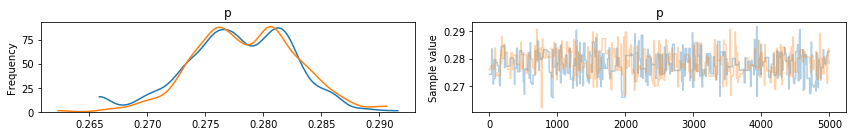

In [11]:
pm.traceplot(trace)
plt.show()

## Additional theoretical aspects

When n=1, it's the bernoulli distribution.

Beta is its conjugate prior distribution, meaning that when a beta function is the prior, the posterior is also a binomial distribution.



### Doubts:

* What is the prior?
* What is the posterior?

PMC3:
* What is pm.Metropolis?
* What is pm.sample?
* What is pm.traceplot?
* How should I interpret the plots?
* What is blue representing in the Frequency plot? And orange?

And most importantly...
* How can I know the probability of getting k=4 heads if I toss a dice n=6 times?